# Data Analysis

1. [Get cleaned data](#BGet-cleaned-data)
2. [Get Zone Name and attach to data](#Get-Zone-Name-and-attach-to-data)
3. [Histogram Comparison: Pickups per Zone](#Histogram-Comparison,-Pickups-per-Zone)
4. [Linear Chart: Pickups evolution over time](#Linear-Chart,-Pickups-evolution-over-time)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (15, 5)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
import altair as alt

# alt.data_transformers.disable_max_rows()

In [2]:
%matplotlib inline

# Get cleaned data

In [3]:
year=2017

df = pd.read_csv('../data/Data_Cleaned_'+str(year)+'_To_Model.csv', sep=',',
                       parse_dates=['datetime'])
df = df.rename(columns={'NoOfPickups':'pickups'})

df.head()

,datetime,month,day,hour,LocationID,pickups,year,week,dayofweek,isweekend,precipitation
0,2017-01-01,1,1,0,4,136.0,2017,52,6,1,0.0
1,2017-01-01,1,1,0,12,3.0,2017,52,6,1,0.0
2,2017-01-01,1,1,0,13,103.0,2017,52,6,1,0.0
3,2017-01-01,1,1,0,24,94.0,2017,52,6,1,0.0
4,2017-01-01,1,1,0,41,136.0,2017,52,6,1,0.0


# Get Zone Name and attach to data

In [4]:
# 1. Import Location and Borough columns form NY TAXI ZONES dataset
dfzones = pd.read_csv('../data/NY_taxi_zones.csv', sep=',',
                      usecols=['LocationID', 'borough', 'zone'])

# 2. Filter Manhattan zones
dfzones = dfzones[dfzones['borough']=='Manhattan']\
                .drop(['borough'], axis=1)\
                .sort_values(by='LocationID')\
                .drop_duplicates('LocationID').reset_index(drop=True)
dfzones.head()

,zone,LocationID
0,Alphabet City,4
1,Battery Park,12
2,Battery Park City,13
3,Bloomingdale,24
4,Central Harlem,41


In [5]:
df2 = df.merge(dfzones, left_on='LocationID', right_on='LocationID')
df2.head()

,datetime,month,day,hour,LocationID,pickups,year,week,dayofweek,isweekend,precipitation,zone
0,2017-01-01 00:00:00,1,1,0,4,136.0,2017,52,6,1,0.0,Alphabet City
1,2017-01-01 01:00:00,1,1,1,4,144.0,2017,52,6,1,0.0,Alphabet City
2,2017-01-01 02:00:00,1,1,2,4,189.0,2017,52,6,1,0.0,Alphabet City
3,2017-01-01 03:00:00,1,1,3,4,186.0,2017,52,6,1,0.0,Alphabet City
4,2017-01-01 04:00:00,1,1,4,4,125.0,2017,52,6,1,0.0,Alphabet City


# Histogram Comparison, Pickups per Zone
The plot shows Manhattan zones ordered by their average number of pickups over the year.

The top ten here:

|Zone|Number of Pickups (mean)|
| --- | --- |
|Upper East Side South:|505.161416|
|Midtown Center|485.399543|
|Upper East Side North|457.652283|
|Penn Station/Madison Sq West|451.312671|
|Midtown East|438.765411|
|Times Sq/Theatre District|435.514155|
|Union Sq|420.867009|
|Murray Hill|412.360616|
|Clinton East|404.736301|
|East Village|377.901941|



In [6]:
df_grouped = df2[['zone', 'pickups']]
df_grouped = df_grouped.groupby('zone').mean().sort_values('pickups', ascending=False).reset_index()

pickups_by_zone = alt.Chart(df_grouped).mark_bar().encode(
    x=alt.X('zone',
            sort=alt.Sort(field='pickups',
                         order='descending')
    ),
    y='pickups',
    tooltip='zone'
).properties(
    width=800
)
pickups_by_zone

alt.Chart(...)

# Linear Chart, Pickups evolution over time

#### 4.1. Pickups evolution over Months
- The number of pickups over the year is quite constant.
- The only variation is a small decrease of pickups over the Summer months: July and August. This can be interpretate as that most of the taxis are taken by new yorkers (not tourists), and in this period they travel away from the city.

#### 4.2. Pickups evolution over Weeks
- This graph shows better how the taxi demand drops drastically on the USA Federal holidays:
    - New Year's Day: January.
    - Independance Day: 4th July.
    - Labor Day: first Monday of September.
    - Thanksgiving: 4th Thursday of November.
    
#### 4.3. Pickups evolution over a Single Week
- This graph shows the average number of pickups per weekday:
    - Monday and Sunday are a bit quieter than the other days, but not much.

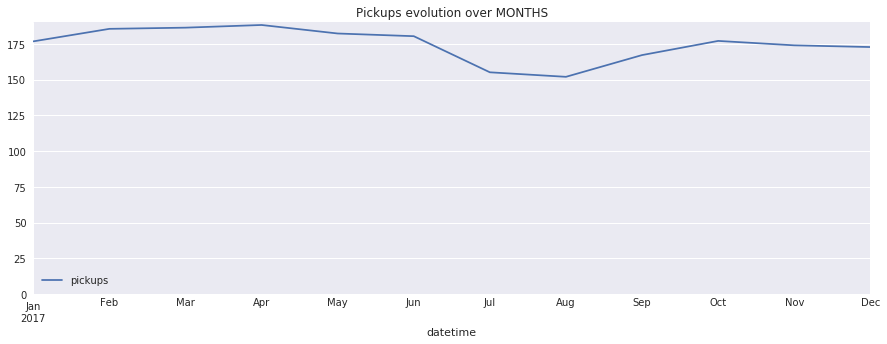

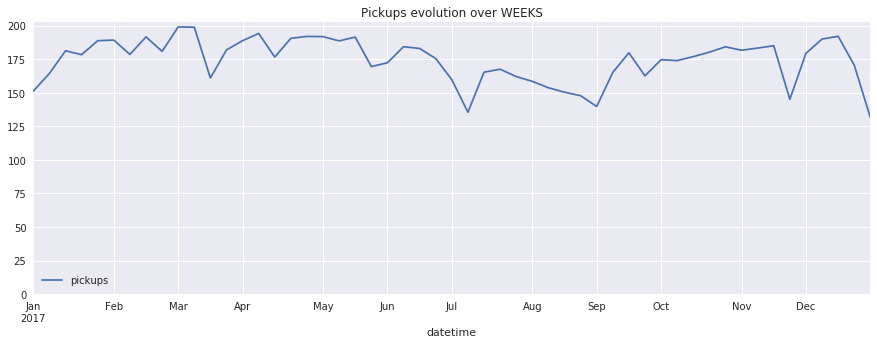

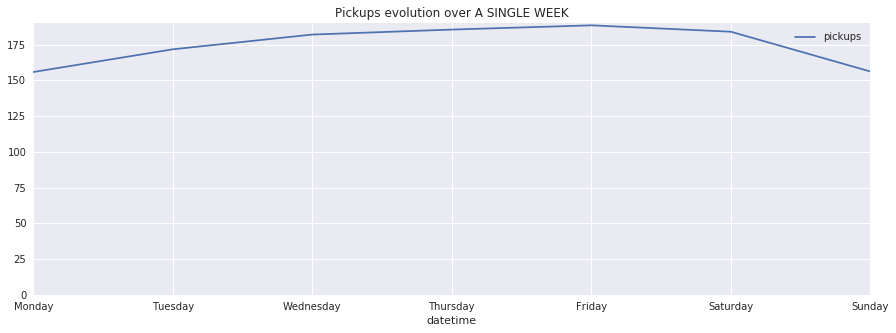

In [89]:
# take 'datetime' and 'pickups' columns
df_grouped = df2[['datetime', 'pickups']]

# MONTHS DATA
df_grouped_months = df_grouped.groupby('datetime').mean().resample('M').mean()

# WEEKS DATA
df_grouped_weeks = df_grouped.groupby('datetime').mean().resample('W').mean()

# WEEKDAY DATA
df_grouped_weekday = df_grouped.groupby('datetime').mean().reset_index()
# create a categorical list to order weekday index
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# define key to groupby: weekday
key = df_grouped_weekday['datetime'].dt.weekday_name
# groupby 'key' (weekday) and reorder index using categorical values
df_grouped_weekday = df_grouped_weekday.groupby(key).mean().reindex(cats)

# PLOT MONTHS
df_grouped_months.plot()
plt.title('Pickups evolution over MONTHS')
plt.ylim(bottom=0)

# PLOT WEEKS
df_grouped_weeks.plot()
plt.title('Pickups evolution over WEEKS')
plt.ylim(bottom=0)

# PLOT WEEKDAYS
df_grouped_weekday.plot()
plt.title('Pickups evolution over A SINGLE WEEK')
plt.ylim(bottom=0)

plt.show()

# Scatter Plot, Relation between Precipitation and Pickups

Probar quitando outliers de precipitation.

Para ello dibujar un box plot de precipitatation

In [105]:
# take 'datetime', 'pickups' and 'precipitation' columns
df_grouped = df2[['datetime', 'pickups', 'precipitation']]

df_grouped = df_grouped.groupby('precipitation').mean().reset_index()
df_grouped.head()

,precipitation,pickups
0,0.00,174.374625
1,0.01,167.937835
2,0.02,168.247761
3,0.03,169.569563
4,0.04,167.087517


In [108]:
# take 'datetime', 'pickups' and 'precipitation' columns
df_grouped = df2[['datetime', 'pickups', 'precipitation']]

df_grouped = df_grouped.groupby('precipitation').mean().reset_index()

pickups_by_prec = alt.Chart(df_grouped).mark_point().encode(
    x='precipitation',
    y='pickups'
).properties(
    title="Relationship between Precipitation and Pickups",
    width=350
).interactive()
pickups_by_prec

alt.Chart(...)